In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [27]:
I = cv2.imread('sample_smaller.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()
h, w = I.shape
print('width:  ', w)
print('height: ', h)


width:   150
height:  95


In [21]:
# 빈칸 채우기 - 초기화 
scale =  150*95                           
pixel_replication = np.zeros((95,150), dtype=np.uint8)
bilinear_interpolation = np.zeros((95,150), dtype=np.uint8)

In [24]:
# Step2 - Pixel Replication 구현, Template 코드 무시하고 본인이 직접 구현하셔도 됩니다.
def make_pixel_replication(img, scale_factor, result):
    p = 0
    q = 0
    for i in range(0,95):                    # 반복문 채우기
        for j in range(0,150):               # 반복문 채우기
            result[i, j] = img[p, q]       
            if  j % 6  == 0:                 # If문 조건 채우기
                q = q + 1
        q = 0
        if  i % 6  == 0:                     # If문 조건 채우기
            p = p + 1
            
    return result

In [30]:
#  Step3 - Bilinear Interpolation, Template 코드 무시하고 본인이 직접 구현하셔도 됩니다.

# 강의자료와 실습과제 PPT에 있는 공식을 이용하세요
def make_bilinear_interpolation(img, scale_factor, result):
    
    for i in range( 0, 95 ):                                # 반복문 채우기
        x1 = np.floor(i/scale_factor)
        x2 = np.ceil(i/scale_factor)
        if x2 == img.shape[0]:
            x2 = img.shape[0]-1

        x = np.mod((i)/scale_factor, 1)

        for j in range( 0,150  ):                            # 반복문 채우기
            y1 = np.floor(j/scale_factor)
            y2 = np.ceil(j/scale_factor)
            if y2 == img.shape[1]:
                y2 = img.shape[1]-1

            left_bottom = img[ 0 ,0  ]                         # 좌표 채우기
            right_bottom = img[ 0 , 149 ]                        # 좌표 채우기
            left_top = img[ 94 , 0 ]                            # 좌표 채우기
            right_top = img[ 94 , 149 ]                           # 좌표 채우기
            y = np.mod(j/scale_factor, 1)
            inter_top = ( right_top *  y) + ( left_top *  (1-y))                 # 연산자 및 채워넣기, left_top과 left_bottom의 interpolation
            inter_bottom = ( right_bottom * y) + ( left_bottom * (1-y))              # 연산자 및 채워넣기, right_top과 right_bottom의 interpolation

            result[i, j] = (inter_bottom * x) + (inter_top * (1-x))
            
    return result

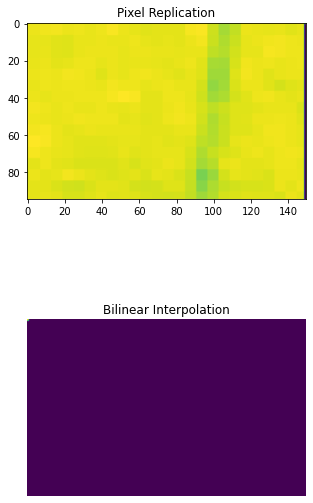

In [38]:
px_replication =  make_pixel_replication(I, scale, pixel_replication)
bilinear_interpolation = make_bilinear_interpolation(I, scale, bilinear_interpolation)

# 실험 결과를 아래 보여주시고 두 방법의 성능을 비교한 걸 주석으로 작성하세요.

# plotting 하는 코드, 중간중간에 비어진 부분을 채워 넣으세요.
# P1B-Step3. Gamma값을 0.1, 0.5, 0.9, 2, 4로 설정하고 실험해보세요
# P1B-Step4. 각각의 실험 결과와 원본 영상을 비교하여 보여주세요
fig = plt.figure(figsize = (5, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 1
  
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(px_replication)
ax1.set_title('Pixel Replication')

 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(bilinear_interpolation)
ax2.set_title('Bilinear Interpolation')
ax2.axis("off")
 
plt.show()